# DAEN 690 Capstone Project

## Import Libraries

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Import Dataset

In [2]:
#load Dataset
#Example input for file name is USM00072712-data.txt
file = input("Please enter file name: ")
#Entering in the city name will be used for the plots in the EDA section
city = input("Please input the station's city name: ")
df = pd.read_csv(file, sep = '\t', header = None)

Please enter file name: USM00072712-data.txt
Please input the station's city name: Caribou, Maine


In [3]:
#Raw Text File
df

,0
0,#USM00072712 1940 06 24 99 1000 10 ...
1,31 -9999 -9999 191 -9999 -9999 -9999 338 ...
2,30 -9999 -9999 500 -9999 -9999 -9999 23 ...
3,30 -9999 -9999 750 -9999 -9999 -9999 68 ...
4,30 -9999 -9999 1000 -9999 -9999 -9999 68 ...
...,...
4797196,20 10832 694 33052B -529B 41 226 102 ...
4797197,20 10905 673 33249B -531B 41 226 93 ...
4797198,20 10925 661 33369B -532B 40 226 80 ...
4797199,20 10940 652 33462B -532B 40 227 78 ...


In [4]:
#This saves the id_number to be used in the standardize_dataset function
id_number = file.split('-')[0]

In [5]:
#This function helps to standardize the dataset using the following steps:
#1. Parsing the text file
#2. Assiging the parsed text to columns in our DataFrame
#3. Combining the header records and data records
#4. Dropping any null rows
#5. Assigning the correct data types to our columns
#6. Returning the standardized DataFrame
def standardize_dataset(id_number, df):
    id_ = []
    year = []
    month = []
    day = []
    hour =[]
    reltime = []
    numlev = []
    p_src = []
    np_src = []
    lat = []
    lon = []

    lvltyp1 = []
    lvltyp2 = []
    etime = []
    press = []
    pflag = []
    gph = []
    zflag = []
    temp = []
    tflag = []
    rh = []
    dpdp = []
    wdir = []
    wspd = []

    for line in df[0]:
        if id_number in line:
            id_.append(line[0:12].strip())
            year.append(line[13:17].strip())
            month.append(line[17:20].strip())
            day.append(line[20:23])
            hour.append(line[23:26])
            reltime.append(line[27:31])
            numlev.append(line[33:36])
            p_src.append(line[37:45])
            np_src.append(line[46:54])
            lat.append(line[56:62])
            lon.append(line[64:71])
            lvltyp1.append(None)
            lvltyp2.append(None)
            etime.append(None)
            press.append(None)
            pflag.append(None)
            gph.append(None)
            zflag.append(None)
            temp.append(None)
            tflag.append(None)
            rh.append(None)
            dpdp.append(None)
            wdir.append(None)
            wspd.append(None)
        else:
            id_.append(None)
            year.append(None)
            month.append(None)
            day.append(None)
            hour.append(None)
            reltime.append(None)
            numlev.append(None)
            p_src.append(None)
            np_src.append(None)
            lat.append(None)
            lon.append(None)
            lvltyp1.append(line[0:1].strip())
            lvltyp2.append(line[1:2].strip())
            etime.append(line[4:8].strip())
            press.append(line[9:15].strip())
            pflag.append(line[15:16].strip())
            gph.append(line[16:21].strip())
            zflag.append(line[21:22].strip())
            temp.append(line[22:27].strip())
            tflag.append(line[27:28].strip())
            rh.append(line[28:33].strip())
            dpdp.append(line[33:39].strip())
            wdir.append(line[40:45].strip())
            wspd.append(line[46:51].strip())
    
    df = pd.DataFrame({
        'id_': id_,
        'year': year,
        'month': month,
        'day': day,
        'hour': hour,
        'reltime': reltime,
        'numlev': numlev,
        'p_src': p_src,
        'np_src': np_src,
        'lat': lat,
        'lon': lon,
        'lvltyp1': lvltyp1,
        'lvltyp2': lvltyp2,
        'etime': etime,
        'press': press,
        'pflag': pflag,
        'gph': gph,
        'zflag': zflag,
        'temp': temp,
        'tflag': tflag,
        'rh': rh,
        'dpdp': dpdp,
        'wdir': wdir,
        'wspd': wspd})
    
    df['id_'].fillna(method = 'ffill', inplace = True)
    df['year'].fillna(method = 'ffill', inplace = True)
    df['month'].fillna(method = 'ffill', inplace = True)
    df['day'].fillna(method = 'ffill', inplace = True)
    df['hour'].fillna(method = 'ffill', inplace = True)
    df['reltime'].fillna(method = 'ffill', inplace = True)
    df['numlev'].fillna(method = 'ffill', inplace = True)
    df['p_src'].fillna(method = 'ffill', inplace = True)
    df['np_src'].fillna(method = 'ffill', inplace = True)
    df['lat'].fillna(method = 'ffill', inplace = True)
    df['lon'].fillna(method = 'ffill', inplace = True)
    
    df = df.dropna()
    
    df['id_'] = df['id_'].astype(str)
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)    
    df['hour'] = df['hour'].astype(int)
    df['reltime'] = df['reltime'].astype(int)
    df['numlev'] = df['numlev'].astype(int)
    df['p_src'] = df['p_src'].astype(str)
    df['np_src'] = df['np_src'].astype(str)
    df['lat'] = df['lat'].astype(int)
    df['lon'] = df['lon'].astype(int)
    df['lvltyp1'] = df['lvltyp1'].astype(int)
    df['lvltyp2'] = df['lvltyp2'].astype(int)
    df['etime'] = df['etime'].astype(int)
    df['press'] = df['press'].astype(int)
    df['pflag'] = df['pflag'].astype(str)
    df['gph'] = df['gph'].astype(int)
    df['zflag'] = df['zflag'].astype(str)
    df['temp'] = df['temp'].astype(int)
    df['tflag'] = df['tflag'].astype(str)
    df['rh'] = df['rh'].astype(int)
    df['dpdp'] = df['dpdp'].astype(int)
    df['wdir'] = df['wdir'].astype(int)
    df['wspd'] = df['wspd'].astype(int)
    
    return df

In [6]:
#Standardized DataFrame
print(city)
df_std = standardize_dataset(id_number, df)
df_std

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,191,,-9999,,-9999,-9999,338,40
2,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,500,,-9999,,-9999,-9999,23,70
3,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,750,,-9999,,-9999,-9999,68,60
4,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,1000,,-9999,,-9999,-9999,68,60
5,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,1500,,-9999,,-9999,-9999,23,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797196,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,694,,33052,B,-529,B,41,226,102,67
4797197,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,673,,33249,B,-531,B,41,226,93,76
4797198,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,661,,33369,B,-532,B,40,226,80,67
4797199,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,652,,33462,B,-532,B,40,227,78,82


## Functions

### Relative Humidity to Ice

Relative Humidity to Ice Equation
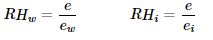
Saturation Water Vapor Pressure
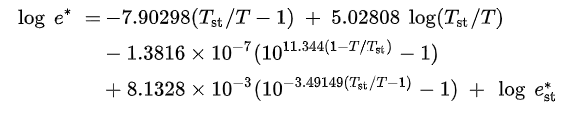
Saturation Water Vapor Pressure Over Ice
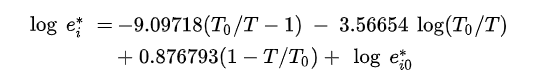

In [7]:
#Calculating Relative Humidity to Ice Steps
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6.Calculate actual vapor pressure
#7. Calculate relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    #Calculate log_ew (Saturation Water Vapor Pressure)
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    #~ denotes when the condition above is false and assigns them with -9999
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [8]:
#Function for ISSR
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [9]:
#Filtering dataset to 2010-2024 data to reduce need to add conversions to entire dataset
df_std = df_std[(df_std['year'] >= 2010) & (df_std['year'] <= 2024)]

### Adding Conversions to DataFrame

In [10]:
#Fahrenheit - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_f'] = df_std['temp']
df_std.loc[condition, 'temp_f'] = df_std.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [11]:
#Kelvins - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition2 = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_k'] = df_std['temp']
df_std.loc[condition2, 'temp_k'] = df_std.loc[condition2, 'temp_k'] / 10 + 273.15

In [12]:
#Pressure Altitude - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition3 = (df_std['press'] != -9999) & (df_std['press'] != -8888)
df_std['press_alt'] = df_std['press'] / 100
df_std.loc[condition3, 'press_alt'] = round(((1 - (df_std.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [13]:
#Relative Humidity to Ice - References Function
warnings.filterwarnings("ignore")
df_std['rh_ice'] = relative_humidity_to_ice(df_std['temp_k'], df_std['rh'])
df_std['rh_ice'] = df_std['rh_ice'].round(3)

In [14]:
#ISSC - References Function
warnings.filterwarnings("ignore")
df_std['issc'] = issr(df_std['temp_f'], df_std['rh_ice'], df_std['press_alt'])

In [15]:
#DataFrame with new added conversion columns
print(city)
df_std

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
2919563,#USM00072712,2010,1,1,0,2305,156,ncdc6301,ncdc6301,468683,...,B,840,22,0,0,14.36,263.35,380.20,0.876,no
2919564,#USM00072712,2010,1,1,0,2305,156,ncdc6301,ncdc6301,468683,...,B,822,25,127,31,14.18,263.25,646.25,0.857,no
2919565,#USM00072712,2010,1,1,0,2305,156,ncdc6301,ncdc6301,468683,...,B,794,29,180,103,13.82,263.05,1522.73,0.829,no
2919566,#USM00072712,2010,1,1,0,2305,156,ncdc6301,ncdc6301,468683,...,B,966,5,191,98,16.52,264.55,1890.16,1.002,no
2919567,#USM00072712,2010,1,1,0,2305,156,ncdc6301,ncdc6301,468683,...,B,968,4,206,87,14.36,263.35,2498.86,1.009,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797196,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,41,226,102,67,-63.22,220.25,89051.77,0.051,no
4797197,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,41,226,93,76,-63.58,220.05,89380.07,0.051,no
4797198,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,40,226,80,67,-63.76,219.95,89571.41,0.050,no
4797199,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,40,227,78,82,-63.76,219.95,89716.77,0.050,no


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [16]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
df_clean = df_std[(df_std['year'] == 2023) & (df_std['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [17]:
#Final Clean Dataset that can be exported to csv, run basic statistics, and plot EDA. 
print(city)
df_clean

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
4643732,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,970,4,6,26,40.46,277.85,999.75,0.951,no
4643733,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,927,11,49,83,40.82,278.05,1499.89,0.908,no
4643734,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,963,5,52,83,41.36,278.35,1580.73,0.942,no
4643735,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,1000,0,60,82,41.36,278.35,1819.52,0.978,no
4643736,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,968,5,76,57,40.46,277.85,2374.19,0.949,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778665,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,21,-9999.00,-9999.00,-99.99,-9999.000,no
4778666,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,41,-9999.00,-9999.00,-99.99,-9999.000,no
4778667,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,100,31,-9999.00,-9999.00,-99.99,-9999.000,no
4778668,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,15,-9999.00,-9999.00,-99.99,-9999.000,no


## Basic Statistics for Dataset

In [18]:
num_rows = len(df_clean)
null_rows = ((df_clean['rh_ice'].isin([-9999, -8888])) |
                                  (df_clean['temp'].isin([-9999, -8888])) |
                                  (df_clean['press'].isin([-9999, -8888]))).sum()
null_rows_percent = (null_rows / len(df_clean)) * 100
issr_count = len(df_clean[df_clean['issc'] == 'yes'])

#Number of null rows means that if a row had -8888 or -9999 values for rh_ice, temp, or pressure
print(f"Dataset Statistics for {city}:")
print("")
print("Number of rows in 2023 data:", num_rows)
print("Number of null rows: ", null_rows)
print("Percent of null rows: ", round(null_rows_percent, 2), "%")
print("Number of rows that meet ISS conditions: ", issr_count)

Dataset Statistics for Caribou, Maine:

Number of rows in 2023 data: 74325
Number of null rows:  33267
Percent of null rows:  44.76 %
Number of rows that meet ISS conditions:  89


## ISS Conditions Exploratory Data Analysis

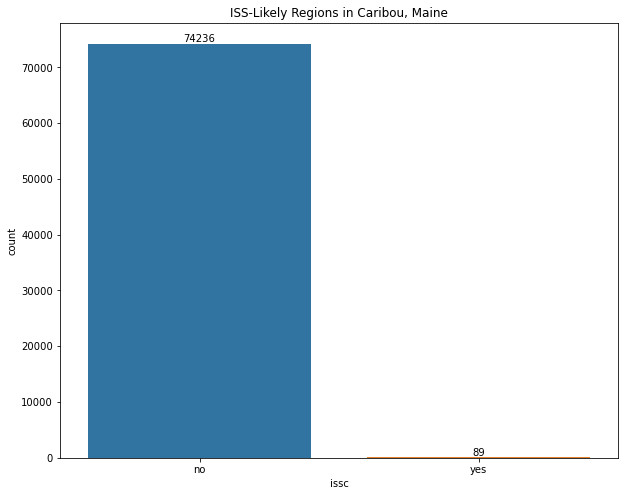

In [19]:
plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'issc', data = df_clean)
ax.set(title = f'ISS-Likely Regions in {city}')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
           f'{int(p.get_height())}', ha = 'center', va = 'bottom')

#plt.savefig(f'{city}_issr_percent.png')

### ISS Conditions were present in the region X% of days a month

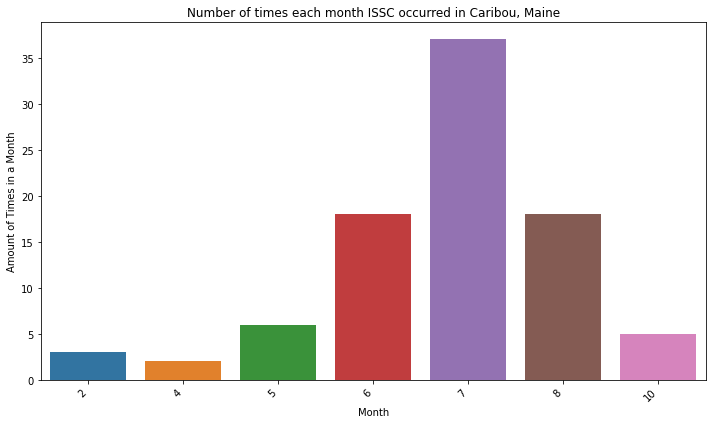

In [20]:
#Capture all days ISSC occurred
issc_yes = df_clean[df_clean['issc'] == "yes"]

#Groupby Month
df_counts = issc_yes.groupby('month').size()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = df_counts.index, y = df_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title(f'Number of times each month ISSC occurred in {city}')
plt.xlabel('Month')
plt.ylabel('Amount of Times in a Month')
plt.tight_layout()

#plt.savefig(f'{city}_times_a_month.png')
plt.show()

## Press_Alt vs RHI & Fahrenheit Visual 

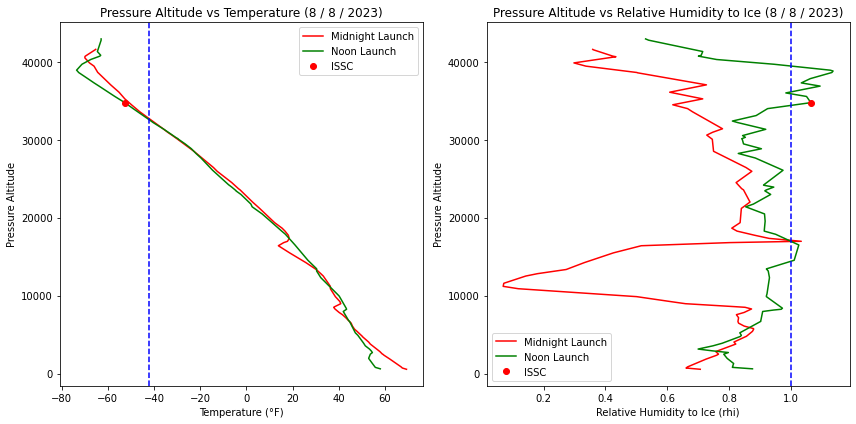

In [21]:
# This visual is created using a specific date 

# Filter data for specific date and remove rows with -9999 / -8888 in the 'rh_ice' column
visual_df = df_clean[(df_clean['month'] == 8) & (df_clean['day'] == 8) & (df_clean['rh_ice'] > 0)]

# Create figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Split the data based on 'hour' (0 for midnight, 12 for noon)
midnight_launch = visual_df[visual_df['hour'] == 0]
noon_launch = visual_df[visual_df['hour'] == 12]

axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')

axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')

# Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]

# Plotting the critical points with red dots on both axes
for dataset, label in zip([critical_midnight, critical_noon], ['Midnight', 'Noon']):
    if not dataset.empty:
        critical_point = dataset.iloc[0]

        # Plot the red dot on the left graph (Temperature vs Pressure Altitude)
        axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], 'ro', label= 'ISSC')

        # Plot the red dot on the right graph (Relative Humidity to Ice vs Pressure Altitude)
        axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], 'ro', label = 'ISSC')

# labels, legends, and titles for the left axes (Temperature vs Pressure Altitude)
axs[0].set_xlabel('Temperature (°F)')
axs[0].set_ylabel('Pressure Altitude')
axs[0].axvline(x=-42, color='blue', linestyle='--')
axs[0].legend()

# labels, legends, and titles for the right axes (Relative Humidity to Ice vs Pressure Altitude)
axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
axs[1].set_ylabel('Pressure Altitude')
axs[1].axvline(x=1, color='blue', linestyle='--')
axs[1].legend()

# Titles 
axs[0].set_title('Pressure Altitude vs Temperature (8 / 8 / 2023)')
axs[1].set_title('Pressure Altitude vs Relative Humidity to Ice (8 / 8 / 2023)')

plt.tight_layout()
plt.show()


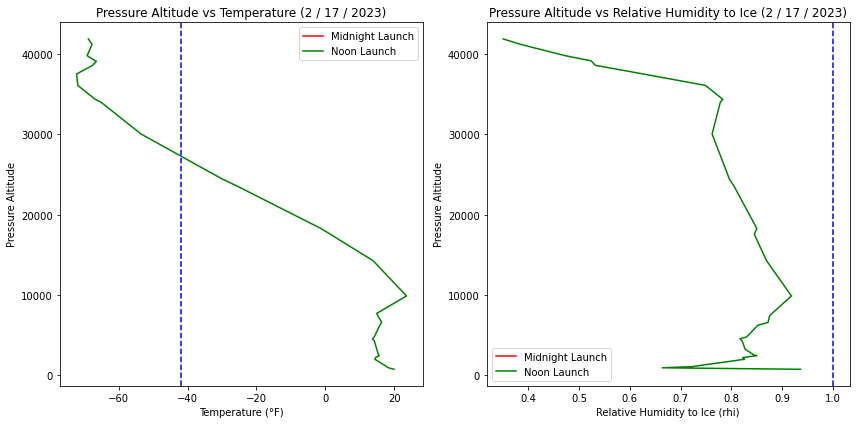

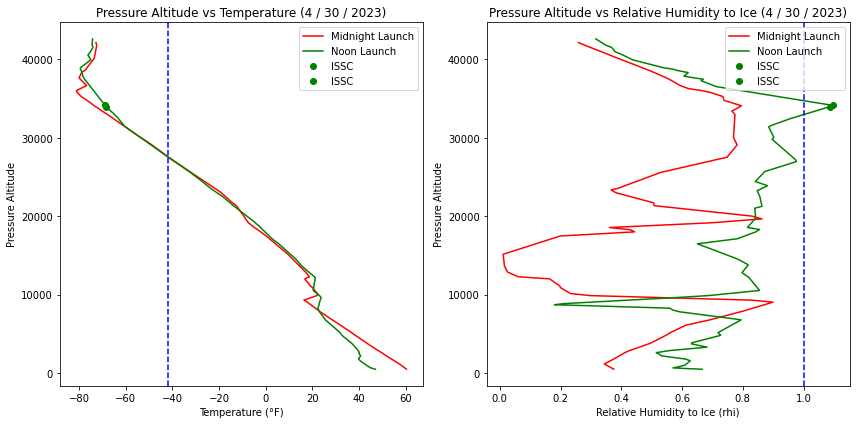

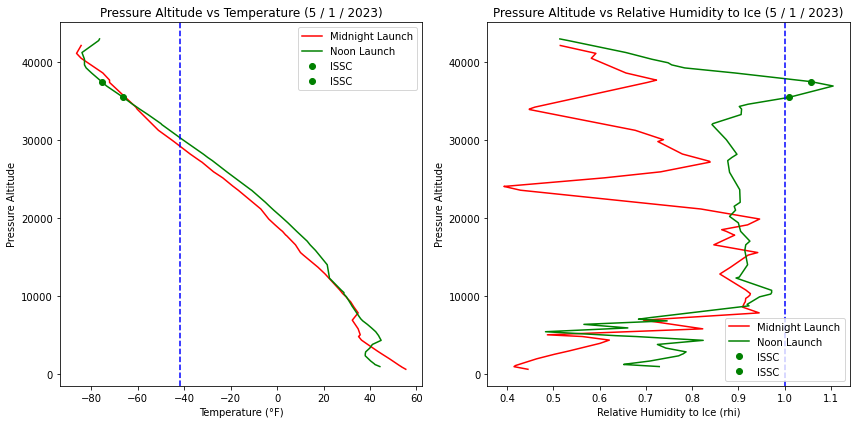

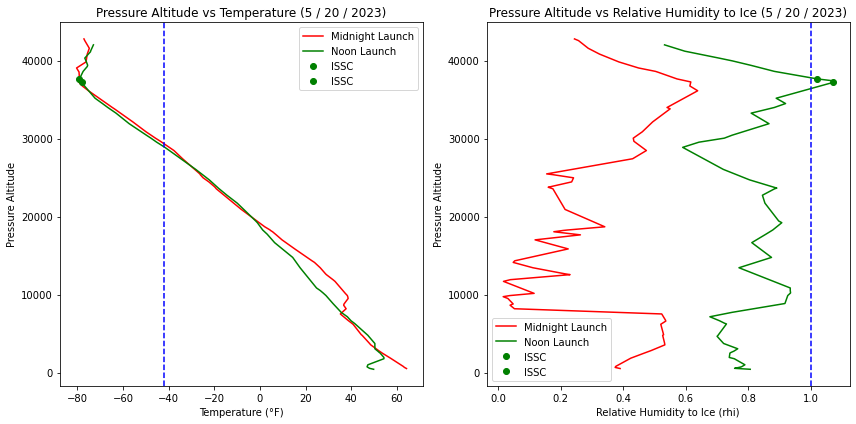

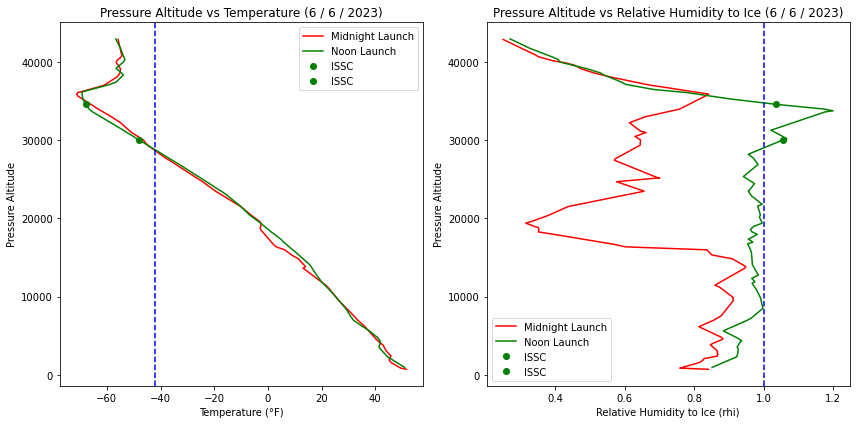

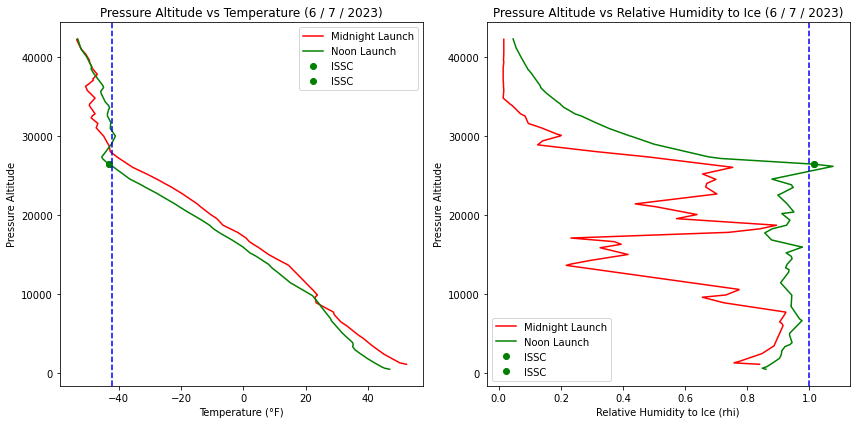

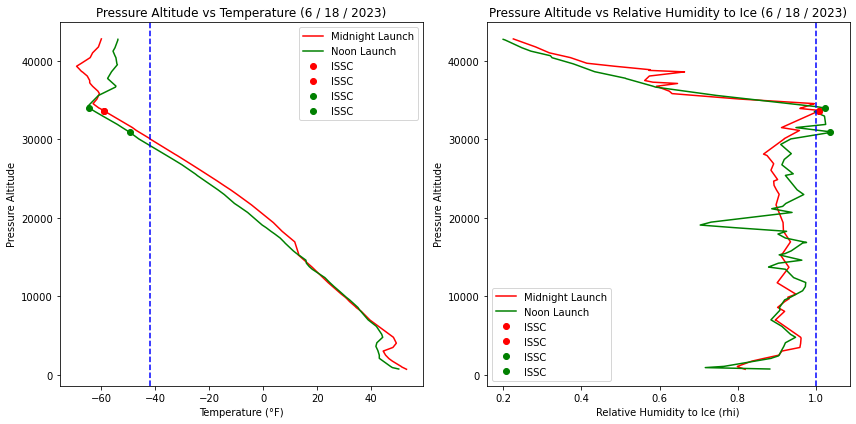

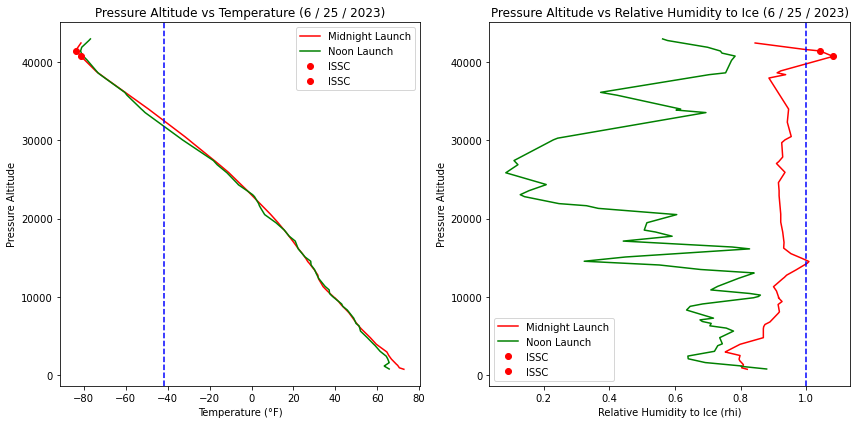

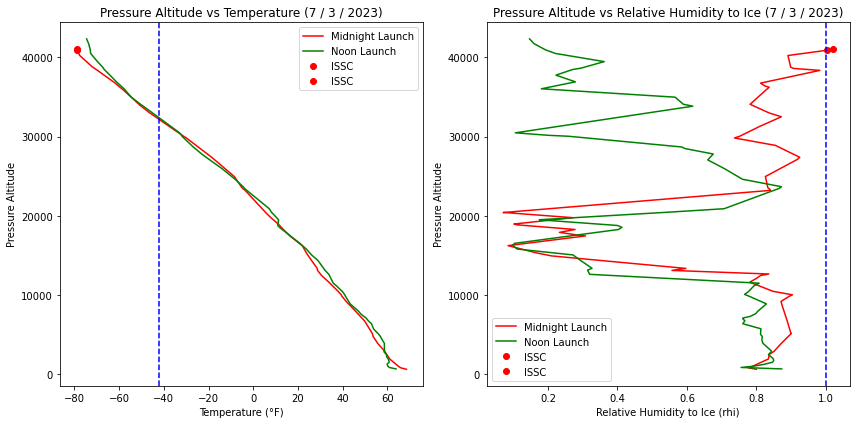

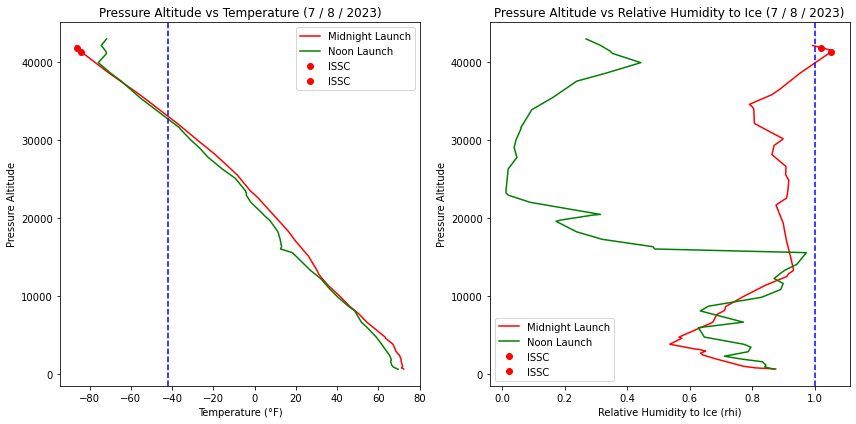

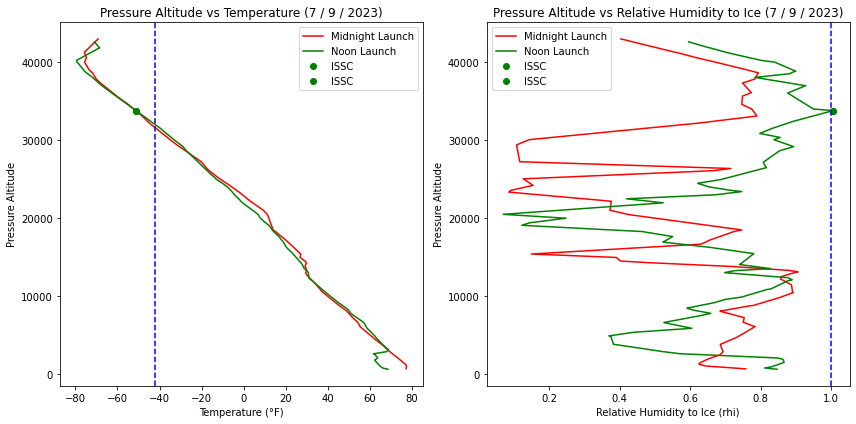

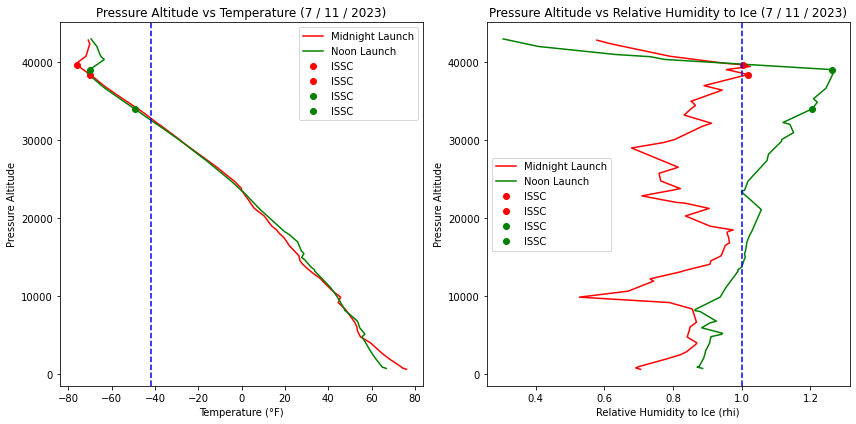

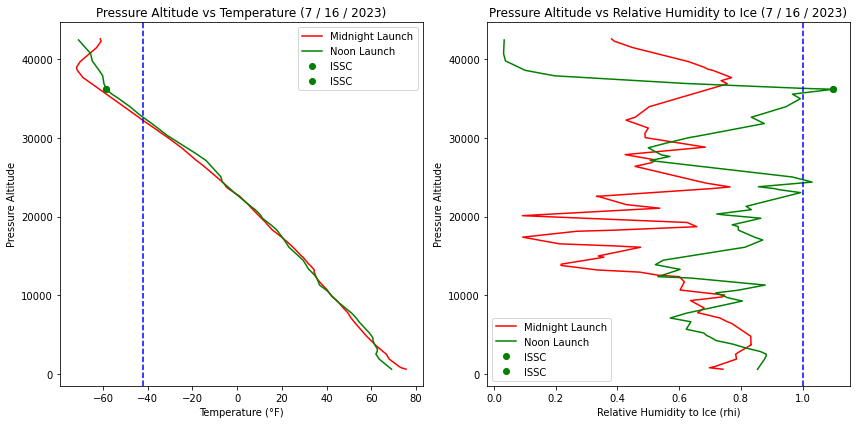

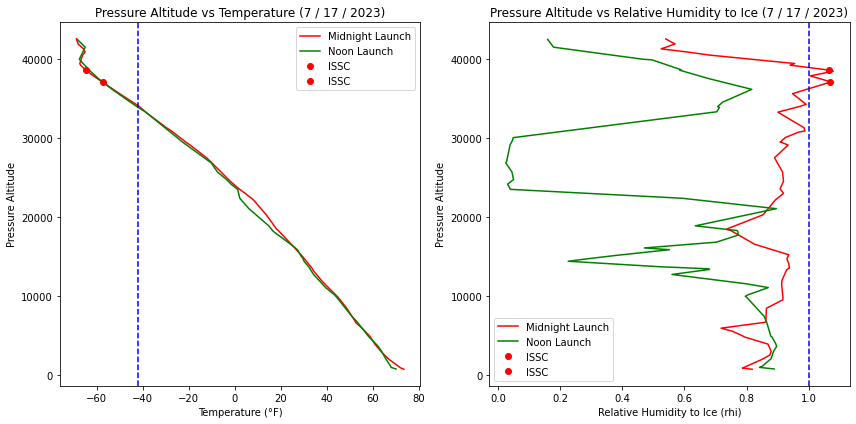

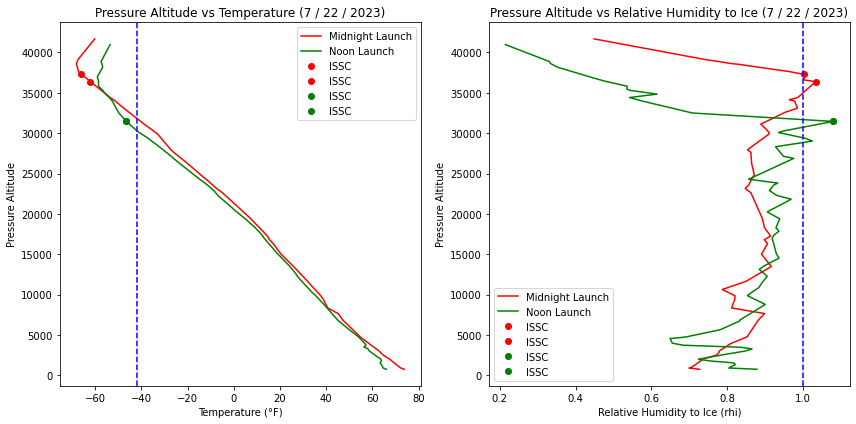

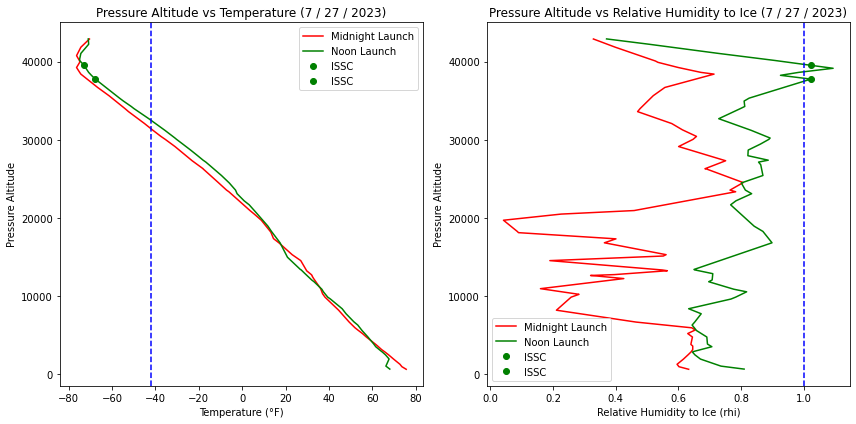

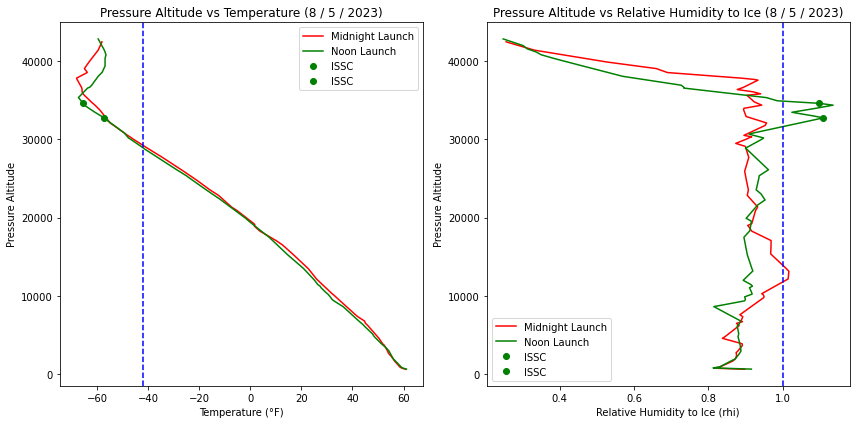

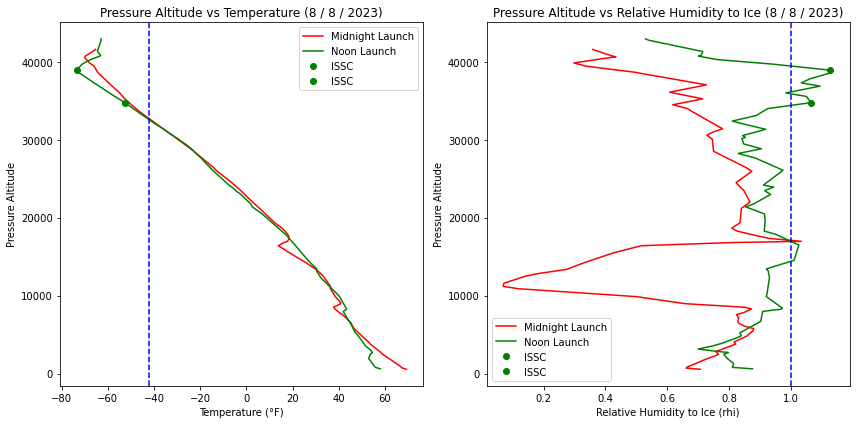

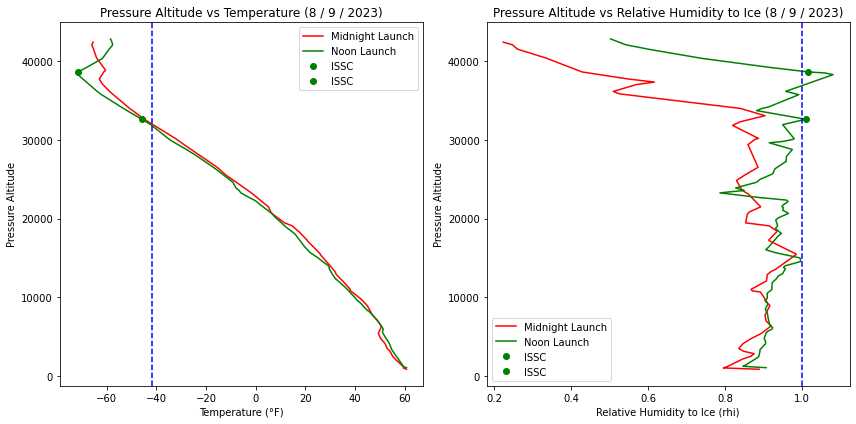

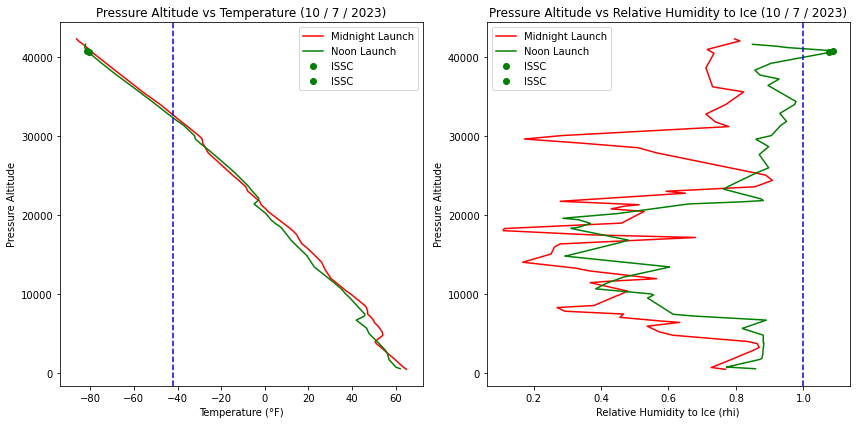

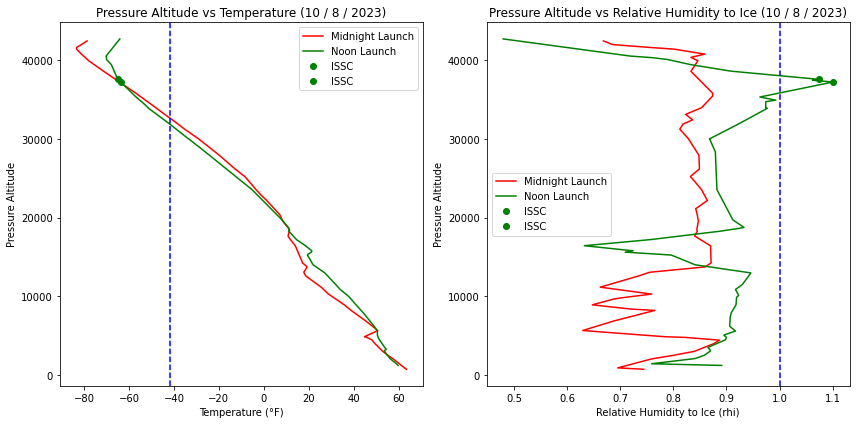

In [22]:
# This cell creates the above visual for each day that has at least one issc = 'yes'
# (not sure why graph for 2 / 17 does not show ISSC. In df_clean it has 3 rows of issc = 'yes')

# Group by 'month' and 'day' and filter groups that have 'yes' in 'issc' column
grouped = df_clean.groupby(['month', 'day'])
days_to_plot = [name for name, group in grouped if (group['issc'] == 'yes').any()]

# loop through the filtered days and plot the visuals
for (month, day) in days_to_plot:
    visual_df_2 = df_clean[(df_clean['month'] == month) & (df_clean['day'] == day) & (df_clean['rh_ice'] > 0)]
    
    # Check if there is any data to plot for this day
    if not visual_df_2.empty:
        # Create figure and axes objects
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Split the data based on 'hour' (0 for midnight, 12 for noon)
        midnight_launch = visual_df_2[visual_df_2['hour'] == 0]
        noon_launch = visual_df_2[visual_df_2['hour'] == 12]
        
        axs[0].plot(midnight_launch['temp_f'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[0].plot(noon_launch['temp_f'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        axs[1].plot(midnight_launch['rh_ice'], midnight_launch['press_alt'], 'r-', label='Midnight Launch')
        axs[1].plot(noon_launch['rh_ice'], noon_launch['press_alt'], 'g-', label='Noon Launch')
        
        # Find the critical points where both temp_f is less than -42 and rh_ice is greater than 1
        critical_midnight = midnight_launch[(midnight_launch['temp_f'] < -42) & (midnight_launch['rh_ice'] > 1)]
        critical_noon = noon_launch[(noon_launch['temp_f'] < -42) & (noon_launch['rh_ice'] > 1)]
        
        # Select the first and last critical points for Midnight
        if not critical_midnight.empty:
            critical_points_midnight = critical_midnight.iloc[[0, -1]]
        else:
            critical_points_midnight = critical_midnight
    
        # Select the first and last critical points for Noon
        if not critical_noon.empty:
            critical_points_noon = critical_noon.iloc[[0, -1]]
        else:
            critical_points_noon = critical_noon
        
        # Plotting the critical pointson both axes
        for critical_points, color in zip([critical_points_midnight, critical_points_noon], ['r', 'g']):
            for index, critical_point in critical_points.iterrows():
            # Plot on the left graph 
                axs[0].plot(critical_point['temp_f'], critical_point['press_alt'], color + 'o', label='ISSC')
            
            # Plot on the right graph 
                axs[1].plot(critical_point['rh_ice'], critical_point['press_alt'], color + 'o', label='ISSC')
        
        # Set labels, legends, and titles
        axs[0].set_xlabel('Temperature (°F)')
        axs[0].set_ylabel('Pressure Altitude')
        axs[0].axvline(x=-42, color='blue', linestyle='--')
        axs[0].legend()
        
        axs[1].set_xlabel('Relative Humidity to Ice (rhi)')
        axs[1].set_ylabel('Pressure Altitude')
        axs[1].axvline(x=1, color='blue', linestyle='--')
        axs[1].legend()
        
        # Titles with the current day
        axs[0].set_title(f'Pressure Altitude vs Temperature ({month} / {day} / 2023)')
        axs[1].set_title(f'Pressure Altitude vs Relative Humidity to Ice ({month} / {day} / 2023)')
        
        plt.tight_layout()
        plt.show()


## Adding Floor and Ceiling Binary Attributes 

In [23]:
# Add 'floor' and 'ceiling' columns to the DataFrame with default values of 0.
df_clean['floor'] = 0
df_clean['ceiling'] = 0

# Identify the first and last 'yes' entries in the 'issc' column for each day.

def identify_floor_ceiling(group):
    # Identify the index of the first and last 'yes' in 'issc' for each group
    issc_yes_indices = group.index[group['issc'] == 'yes'].tolist()
    if issc_yes_indices:
        # If there's only one 'yes' entry, mark it as both floor and ceiling
        if len(issc_yes_indices) == 1:
            group.loc[issc_yes_indices[0], 'floor'] = 1
            group.loc[issc_yes_indices[0], 'ceiling'] = 1
        else:
            # Mark the first and last 'yes' entries appropriately
            group.loc[issc_yes_indices[0], 'floor'] = 1
            group.loc[issc_yes_indices[-1], 'ceiling'] = 1
    return group

# Applying the function to each group
df_clean = df_clean.groupby(['month', 'day']).apply(identify_floor_ceiling)

df_clean[df_clean['issc'] == 'yes']

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc,floor,ceiling
4650428,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,14,259,816,-62.50,220.65,33800.54,1.041,yes,1,0
4650431,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,13,261,875,-73.48,214.55,36201.96,1.065,yes,0,0
4650540,#USM00072712,2023,2,17,18,1704,107,ncdc-nws,,468683,...,18,254,877,-79.06,211.45,37500.52,1.005,yes,0,1
4670545,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,11,252,371,-68.26,217.45,33984.70,1.087,yes,1,0
4670546,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,11,251,378,-68.80,217.15,34136.04,1.097,yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745354,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,13,220,514,-80.68,210.55,40567.47,1.077,yes,1,0
4745355,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,12,220,511,-81.40,210.15,40778.22,1.088,yes,0,1
4745759,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,10,156,558,-63.76,219.95,37252.00,1.101,yes,1,0
4745760,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,13,158,560,-64.66,219.45,37474.30,1.062,yes,0,0


## Export to CSV

In [24]:
#df_clean.to_csv(f'{city}_issr2023.csv', index = False)